In [68]:
import pandas as pd

In [69]:
df=pd.read_csv("C:\DSA\Advertising (1).csv")

In [70]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [71]:
import scipy.stats as stats

In [72]:
fvalue, pvalue = stats.f_oneway(df['TV'], df['Radio'], df['Newspaper'])

In [73]:
print(fvalue, pvalue)

358.8514595342597 4.552931539744962e-103


In [74]:
if pvalue<0.05:
    print(' Reject H0: there is a difference in means')
else:
    print('Reject Ha: There is no difference in means')

          

 Reject H0: there is a difference in means


In [75]:
#ANOVA STATISTICS BY STATSMODEL

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [77]:
df_melt=pd.melt(df.reset_index(), id_vars=['index'], value_vars=['TV', 'Radio', 'Newspaper'])

In [78]:
df_melt.columns = ['index', 'treatments', 'value']

In [79]:
df_melt.head()

,index,treatments,value
0,0,TV,230.1
1,1,TV,44.5
2,2,TV,17.2
3,3,TV,151.5
4,4,TV,180.8


In [80]:
# data Distribution by treatment using Box Plot

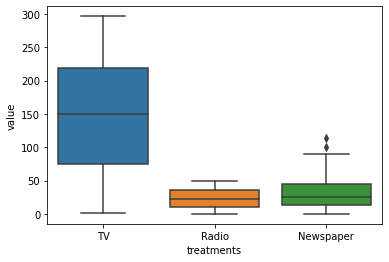

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt)

plt.show()

ANOVA STATISTICS BY STATSMODEL

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [83]:
model = ols('value ~ C(treatments)', data=df_melt).fit()

In [84]:
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,1.929589e+06,964794.393150,358.85146,4.552932e-103
Residual,597.0,1.605072e+06,2688.561987,NaN,NaN


In [85]:
#TURKEYS HSD TEST BASED ON STATS MODEL

In [86]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [87]:
turkey_Hsd = pairwise_tukeyhsd(endog=df_melt['value'],
                          groups=df_melt['treatments'],
                          alpha=0.05)

In [88]:
print(turkey_Hsd)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1  group2 meandiff p-adj   lower    upper   reject
---------------------------------------------------------
Newspaper  Radio    -7.29 0.3392 -19.4732   4.8932  False
Newspaper     TV 116.4885  0.001 104.3053 128.6717   True
    Radio     TV 123.7785  0.001 111.5953 135.9617   True
---------------------------------------------------------


In [89]:
#Based on p value , there is a diffrence in mean  between Newspaper and Tv and also in between Radio and TV.

In [ ]:
nt#Based on Anova Test it is conclude that ,different amount was spent on TV compared to news paper and Radio